In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('InputData/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
def func(row):
    if row['age'] < 21:
        return 'Children'
    elif row['age'] >21 and row['age']< 61:
        return 'Adult' 
    else:
        return 'senier citi'

df['age_group'] = df.apply(func, axis=1)

In [15]:
cols_w_diff_categories= ['sex', 'children', 'smoker', 'region']
count_of_categories= ['sex', 'region','age_group']
cols_w_values= ['age', 'bmi', 'charges']


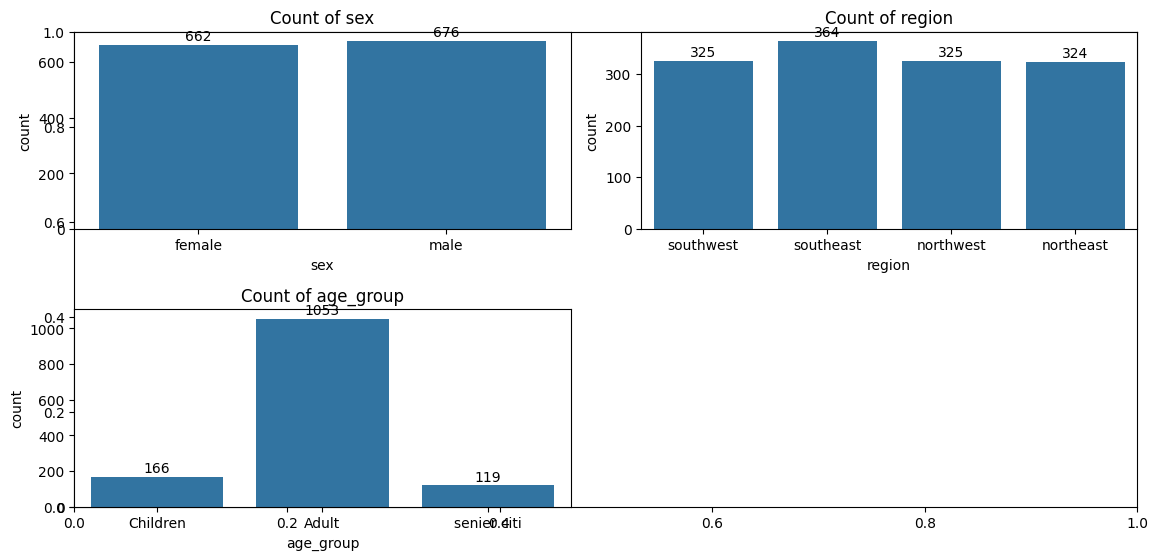

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))

for i, col in enumerate(count_of_categories, 1):
    
    ax = plt.subplot(2, 2, i)
    
    sns.countplot(x=df[col].astype('object'), ax=ax)
    plt.title(f'Count of {col}')
    
    for c in ax.containers:
        ax.bar_label(c, fmt='%d', padding=1)
        
    # ax.remove() 

plt.tight_layout()
plt.show()

# Explicitly close the figure to remove overlapping axes
plt.close(fig)

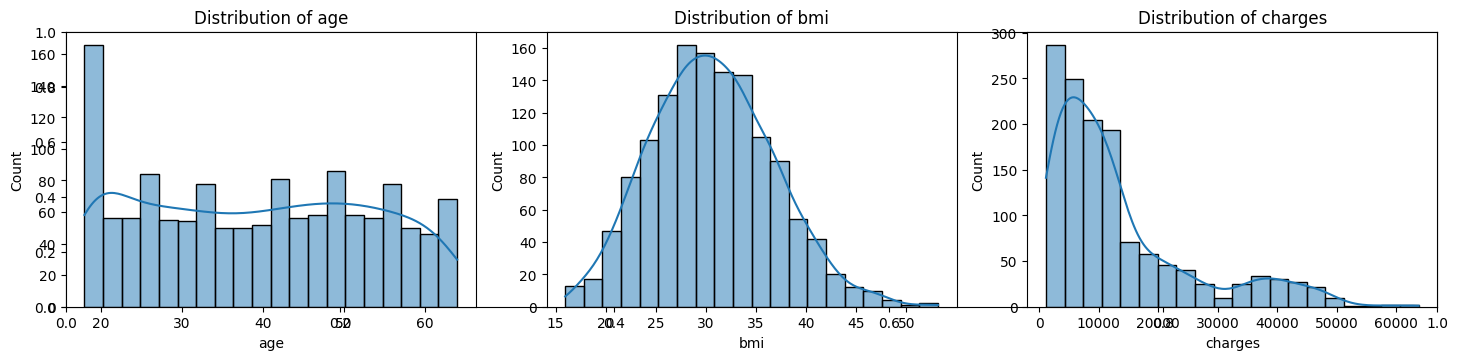

In [11]:
### number of unique elements > 6
fig, ax = plt.subplots(figsize=(15, 4))

for i, col in enumerate(cols_w_values, 1):
    plt.subplot(1, 3, i)
    sns.histplot(x=df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

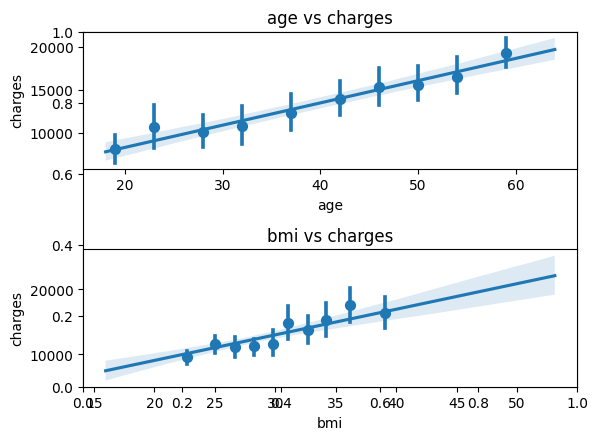

In [18]:
### number of unique elements > 6
# box plot of 'charges' & other variables
fig, ax = plt.subplots()

charges_vs_categories = [col for col in cols_w_values if col != 'charges']

for i, col in enumerate(charges_vs_categories, 1):
    plt.subplot(2, 1, i)

    ax = sns.regplot(data=df, x=df[col], y='charges', x_bins=10)
    plt.title(f'{col} vs charges')

plt.tight_layout()
plt.show()